In [181]:
import numpy as np
import pandas as pd
brain = pd.read_csv('brain_size.csv', sep=";", index_col=0 , na_values=['.']) #index_col która kolumna jest indeksująca, 
#na_values - które wartości traktować jako NaN

print(brain.head())
print(brain.describe())
print(type(brain))
print(brain.shape)
print(brain.columns)

print(brain.isnull().values.any()) #sprawdzi czy są jakieś puste wartości

print(brain.Weight.dtype) #dtype - wewnętrzny typ danych

print(brain.dtypes) #podaje typy kolumn

print(brain.info()) #wyświteli info o ramce, ile danych nieobecnych! rozszerzony describe

   Gender  FSIQ  VIQ  PIQ  Weight  Height  MRI_Count
1  Female   133  132  124   118.0    64.5     816932
2    Male   140  150  124     NaN    72.5    1001121
3    Male   139  123  150   143.0    73.3    1038437
4    Male   133  129  128   172.0    68.8     965353
5  Female   137  132  134   147.0    65.0     951545
             FSIQ         VIQ        PIQ      Weight     Height     MRI_Count
count   40.000000   40.000000   40.00000   38.000000  39.000000  4.000000e+01
mean   113.450000  112.350000  111.02500  151.052632  68.525641  9.087550e+05
std     24.082071   23.616107   22.47105   23.478509   3.994649  7.228205e+04
min     77.000000   71.000000   72.00000  106.000000  62.000000  7.906190e+05
25%     89.750000   90.000000   88.25000  135.250000  66.000000  8.559185e+05
50%    116.500000  113.000000  115.00000  146.500000  68.000000  9.053990e+05
75%    135.500000  129.750000  128.00000  172.000000  70.500000  9.500780e+05
max    144.000000  150.000000  150.00000  192.000000  77.0

In [42]:
print(brain[brain.Gender=='Female']['VIQ'].mean())
#brain.Gender=='Female'
print(brain[brain.Gender=='Male']['VIQ'].mean())

109.45
115.25


In [183]:
brain.groupby('Gender')['VIQ'].mean()

Gender
Female    109.45
Male      115.25
Name: VIQ, dtype: float64

Female         AxesSubplot(0.1,0.15;0.363636x0.75)
Male      AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

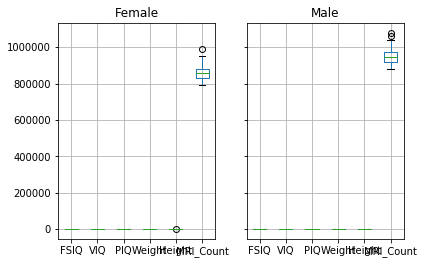

In [55]:
genders = brain.groupby('Gender')
genders.mean()
import matplotlib as mp
import matplotlib.pyplot as plt
genders.boxplot()

In [62]:
from scipy import stats 
f = brain[brain['Gender']=='Female']['VIQ']
m = brain[brain['Gender']=='Male']['VIQ']
stats.ttest_ind(f,m) 

Ttest_indResult(statistic=-0.7726161723275011, pvalue=0.44452876778583217)

In [85]:
hw = pd.read_csv('01_heights_weights_genders.csv')


hw['heigths_m'] = hw['Height'] * 2.5 #stworzenie nowej kolumny przez przeskalowanie starej
hw['weights_m'] = hw['Weight'] * 0.454 

print(hw.head())
print(hw.tail())

print(hw.shape)
print(hw.columns)
list(hw) #lista nazw kolumn
hw.describe()
hw.info()

hw.groupby("Gender").weights_m.mean() #średnia waga po płci

  Gender     Height      Weight   heigths_m   weights_m
0   Male  73.847017  241.893563  184.617543  109.819678
1   Male  68.781904  162.310473  171.954760   73.688955
2   Male  74.110105  212.740856  185.275263   96.584348
3   Male  71.730978  220.042470  179.327446   99.899282
4   Male  69.881796  206.349801  174.704490   93.682809
      Gender     Height      Weight   heigths_m  weights_m
9995  Female  66.172652  136.777454  165.431630  62.096964
9996  Female  67.067155  170.867906  167.667887  77.574029
9997  Female  63.867992  128.475319  159.669981  58.327795
9998  Female  69.034243  163.852461  172.585608  74.389017
9999  Female  61.944246  113.649103  154.860615  51.596693
(10000, 5)
Index(['Gender', 'Height', 'Weight', 'heigths_m', 'weights_m'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
Gender       10000 non-null object
Height       10000 non-null float64
Weight       10000 non-null float64
heigt

Gender
Female    61.680482
Male      84.907362
Name: weights_m, dtype: float64

In [93]:
m = hw[hw.Gender=='Male'].weights_m
f = hw[hw.Gender=='Female']['weights_m']
stats.ttest_ind(m,f)

Ttest_indResult(statistic=131.81952765081866, pvalue=0.0)

In [112]:
hw['target'] = hw['Gender'] #nowa kolumna dla modelu, po prostu nasz target to kopia Gender 
hw['target'] = np.where(hw['Gender'] == 'Male', 0, hw['target']) #zamiana kolumny kategoryjnej na numeryczna, konieczne dla dalszej analizy
hw['target'] = np.where(hw['Gender'] == 'Female', 1, hw['target'])

print(hw.head())
print(hw.tail())

hw['target'].unique() # target jest dalej kategoryjny, dtype = object
hw['target'] = hw['target'].astype('int')
hw['target'].unique()


  Gender     Height      Weight   heigths_m   weights_m target
0   Male  73.847017  241.893563  184.617543  109.819678      0
1   Male  68.781904  162.310473  171.954760   73.688955      0
2   Male  74.110105  212.740856  185.275263   96.584348      0
3   Male  71.730978  220.042470  179.327446   99.899282      0
4   Male  69.881796  206.349801  174.704490   93.682809      0
      Gender     Height      Weight   heigths_m  weights_m target
9995  Female  66.172652  136.777454  165.431630  62.096964      1
9996  Female  67.067155  170.867906  167.667887  77.574029      1
9997  Female  63.867992  128.475319  159.669981  58.327795      1
9998  Female  69.034243  163.852461  172.585608  74.389017      1
9999  Female  61.944246  113.649103  154.860615  51.596693      1


array([0, 1], dtype=int64)

In [113]:
hw['target'].unique()

hw['target'].value_counts()

1    5000
0    5000
Name: target, dtype: int64

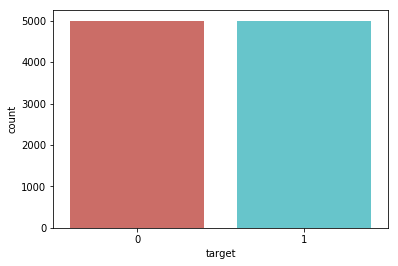

In [117]:
import seaborn as sms #wizualizacje statystyczne
sms.countplot(data=hw, x='target', palette='hls')

           Height      Weight   heigths_m  weights_m
target                                              
0       69.026346  187.020621  172.565865  84.907362
1       63.708774  135.860093  159.271934  61.680482


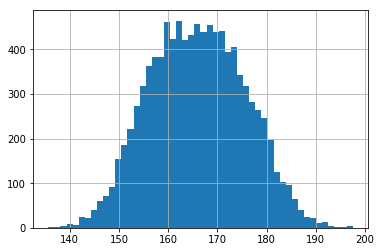

In [129]:
print(hw.groupby('target').mean())
hw['heigths_m'].hist(bins=50)

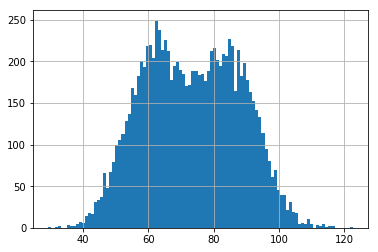

In [184]:
hw['weights_m'].hist(bins=100)

target
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: weights_m, dtype: object

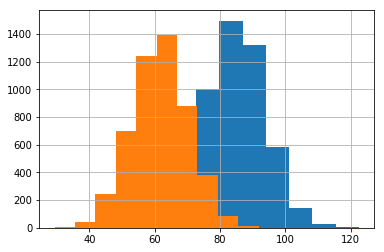

In [140]:
hw.groupby('target')['weights_m'].hist() #histogram podzielony na płcie

In [168]:
#jak oszacować płeć na podstawie wagi i wieku
#użyjemy regresji logistycznej - to klasyfikator binarny!

# y - tagret - to co prognozujemy
# X - nasze dane


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

y= hw['target']
X = hw[['weights_m', 'heigths_m']]

#dzielimy dane na zbiór treningowy i walidacyjny
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3) 
#czyli 70% do train, 30% do test

#regresja - uczymy na zbiorze treningowym
logreg = LogisticRegression()
logreg.fit(X_train,y_train) 

#przewidujemy jak model zadziała na danych testowych
y_pred = logreg.predict(X_test) 
print(y_pred)


#jakie jest prawdopodobieństwo, że wypadnie [0, 1]
y_prob = logreg.predict_proba(X_test)
y_prob

[1 1 1 ... 0 1 1]


array([[1.581e-01, 8.419e-01],
       [1.872e-01, 8.128e-01],
       [4.072e-03, 9.959e-01],
       ...,
       [7.595e-01, 2.405e-01],
       [4.242e-02, 9.576e-01],
       [4.953e-04, 9.995e-01]])

In [171]:
X_test.head()
#tworzymy słownik z naszymi własnymi danymi


slownik = {'weights_m': [92,67,65,69,100,70], 'heigths_m':[170,172,168,169,198,181]}
X_class = pd.DataFrame(slownik)

y_class = logreg.predict(X_class)
y_class
np.set_printoptions(precision=3)
y_prob1 = (logreg.predict_proba(X_class))
y_prob1

#logreg.coef_

array([[1.000e+00, 4.581e-25],
       [1.000e+00, 1.612e-27],
       [1.000e+00, 6.221e-27],
       [1.000e+00, 8.672e-27],
       [1.000e+00, 1.142e-29],
       [1.000e+00, 5.800e-29]])

In [185]:
X_class

,heigths_m,weights_m
0,170,92
1,172,67
2,168,65
3,169,69
4,198,100
5,181,70


In [180]:
import statsmodels.api as sm
log_model = sm.Logit(y,X)
result = log_model.fit()
#print(result.summary())
#logreg.summary()
X_class

Optimization terminated successfully.
         Current function value: 0.209143
         Iterations 8


,heigths_m,weights_m
0,170,92
1,172,67
2,168,65
3,169,69
4,198,100
5,181,70
